Link para acesso do dataset:
https://www.data.rio/documents/f8057e94b0724367a78fa859f5be9a76/about

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import streamlit as st
import xlrd
from matplotlib import dates as mdates

Tratando o dataset

In [4]:
df = pd.read_excel('data\dados.xls', engine='xlrd', header = 6).dropna().drop(columns = ['Unnamed: 1'])

df = df.rename(
    columns={
        'Unnamed: 0':'Ano'
    }
    )

df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Matheus\AppData\Local\Temp\ipykernel_6608\1004458197.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_excel('data\dados.xls', engine='xlrd', header = 6).dropna().drop(columns = ['Unnamed: 1'])


,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
1,1997,71.20,68.52,60.65,57.67,54.18,48.58,62.49,62.85,61.44,70.47,73.35,66.22
2,1998,74.95,70.52,68.98,70.11,61.60,58.62,61.94,65.56,62.99,65.81,68.41,64.89
3,1999,71.11,70.15,63.88,64.99,60.69,57.41,68.14,65.06,62.25,67.49,72.89,64.09
4,2000,77.69,70.79,75.33,76.24,63.41,58.97,68.74,69.27,65.72,73.41,75.87,65.80
5,2001,76.41,73.69,68.37,66.30,59.20,56.41,69.09,65.15,61.85,68.44,70.48,64.10
6,2002,70.65,67.27,60.60,57.04,52.71,51.21,63.51,66.99,66.23,58.75,64.93,60.62
7,2003,69.26,68.15,70.29,59.38,54.83,51.62,61.54,58.59,57.94,56.75,65.34,57.16
8,2004,63.37,70.61,63.75,59.33,58.49,52.24,55.94,60.36,62.24,66.15,70.81,57.74
9,2005,62.68,60.72,63.85,61.32,53.40,54.48,56.95,58.08,55.07,66.09,64.72,58.37
10,2006,64.59,68.32,70.51,64.56,55.12,53.73,56.55,59.15,62.13,65.13,76.06,60.83


In [20]:
df.head(21)

,Ano,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
1,1997,71.20,68.52,60.65,57.67,54.18,48.58,62.49,62.85,61.44,70.47,73.35,66.22
2,1998,74.95,70.52,68.98,70.11,61.60,58.62,61.94,65.56,62.99,65.81,68.41,64.89
3,1999,71.11,70.15,63.88,64.99,60.69,57.41,68.14,65.06,62.25,67.49,72.89,64.09
4,2000,77.69,70.79,75.33,76.24,63.41,58.97,68.74,69.27,65.72,73.41,75.87,65.80
5,2001,76.41,73.69,68.37,66.30,59.20,56.41,69.09,65.15,61.85,68.44,70.48,64.10
6,2002,70.65,67.27,60.60,57.04,52.71,51.21,63.51,66.99,66.23,58.75,64.93,60.62
7,2003,69.26,68.15,70.29,59.38,54.83,51.62,61.54,58.59,57.94,56.75,65.34,57.16
8,2004,63.37,70.61,63.75,59.33,58.49,52.24,55.94,60.36,62.24,66.15,70.81,57.74
9,2005,62.68,60.72,63.85,61.32,53.40,54.48,56.95,58.08,55.07,66.09,64.72,58.37
10,2006,64.59,68.32,70.51,64.56,55.12,53.73,56.55,59.15,62.13,65.13,76.06,60.83


Utilizado o método melt para deixar a base de dados em apenas duas colunas, ano/mes e o valor

In [5]:
df = pd.melt(df, id_vars=["Ano"], var_name="Mes", value_name="ocupacao")

In [22]:
df.columns

Index(['Ano', 'Mes', 'ocupacao'], dtype='object')

In [26]:
print(f'Quantidade de Linhas: {len(df)}')

Quantidade de Linhas: 252


Transformando a concatenação da coluna Ano e Mês para o formato data

In [6]:
mes_map = {
    'Janeiro': '01', 'Fevereiro': '02', 'Março': '03', 'Abril': '04',
    'Maio': '05', 'Junho': '06', 'Julho': '07', 'Agosto': '08',
    'Setembro': '09', 'Outubro': '10', 'Novembro': '11', 'Dezembro': '12'
}

df['Mes_Num'] = df['Mes'].map(mes_map)

df['Data'] = df['Ano'].astype(str) + '-' + df['Mes_Num'] + '-01'

df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

df.tail()

,Ano,Mes,ocupacao,Mes_Num,Data
247,2013,Dezembro,63.5,12,2013-12-01
248,2014,Dezembro,65.4,12,2014-12-01
249,2015,Dezembro,61.0,12,2015-12-01
250,2016,Dezembro,51.0,12,2016-12-01
251,2017,Dezembro,58.0,12,2017-12-01


In [7]:
df = df[df['Ano']>= 2016]

df.head()

,Ano,Mes,ocupacao,Mes_Num,Data
19,2016,Janeiro,71.0,01,2016-01-01
20,2017,Janeiro,64.0,01,2017-01-01
40,2016,Fevereiro,67.0,02,2016-02-01
41,2017,Fevereiro,58.0,02,2017-02-01
61,2016,Março,69.0,03,2016-03-01


1 - ✔
2 - ✔
3 - ✔
4 - ✔
5 - ✔
6 - ✔
7
8
9 - ✔
10 - ✔
11 - ✔
12 - ✔


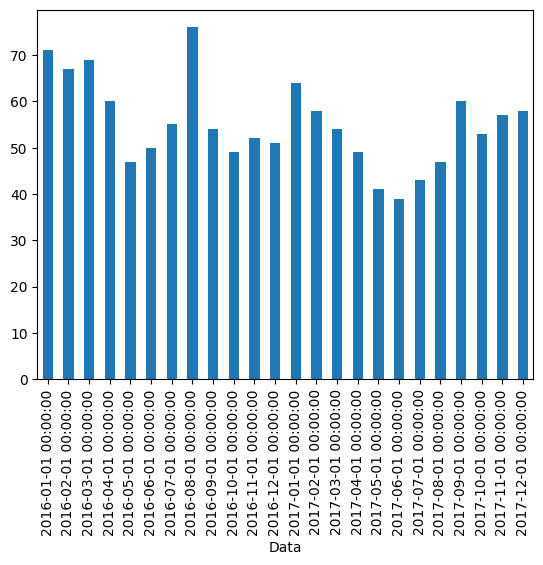

In [40]:
df_data = df.copy()

df_data = df_data.sort_values(by='Data')

df_data = df_data.set_index('Data')

ax = df_data['ocupacao'].plot(kind = 'bar')

In [42]:
st.scatter_chart(df,x = 'Mes_Num',y = 'ocupacao')

2024-09-17 16:56:18.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-17 16:56:18.348 
  command:

    streamlit run c:\Users\Matheus\dr1_tp3\amb_virtual\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-09-17 16:56:18.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()